In [2]:
# pip install -U transformers: ÿ¥ÿßŸÖŸÑ ŸÖÿØŸÑ Ÿáÿß€å ÿßÿ≤ Ÿæ€åÿ¥ ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØÿßÿØŸá ÿ¥ÿØŸá ÿ®ÿ±ÿß€å Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ≤ÿ®ÿßŸÜ ÿ∑ÿ®€åÿπ€å ÿßÿ≥ÿ™
# pip install -U accelerate: ÿ®ÿ±ÿß€å ŸÖÿØ€åÿ±€åÿ™ ŸÖŸÜÿßÿ®ÿπ ÿ≥ÿÆÿ™ ÿßŸÅÿ≤ÿßÿ±€å ÿßÿ≥ÿ™ ŸÖÿßŸÜŸÜÿØ Ÿæÿ±ÿØÿßÿ≤ŸÜÿØŸá Ÿáÿß€å ⁄Øÿ±ÿßŸÅ€å⁄©€å Ÿà ÿ®Ÿá€åŸÜŸá ÿ≥ÿßÿ≤€å ŸÖÿØ€åÿ±€åÿ™ ÿπŸÖŸÑ⁄©ÿ±ÿØ ŸÖÿØŸÑ Ÿáÿß Ÿáÿ≥ÿ™
# pip install -U datasets: ÿ¥ÿßŸÖŸÑ ÿØ€åÿ™ÿßÿ≥ÿ™ Ÿáÿß€å ÿ¢ŸÖÿßÿØŸá ŸÖ€å ÿ®ÿßÿ¥ÿØ
# pip install -U bertviz: ŸÜÿ≠ŸàŸá ÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿ®€åŸÜ ⁄©ŸÑŸÖÿßÿ™ Ÿà ÿ¨ŸÖŸÑÿßÿ™ ÿØÿ± Ÿáÿ± ŸÑÿß€åŸá BERT ÿ±ÿß ŸÜŸÖÿß€åÿ¥ ŸÖ€å ÿØŸáÿØ
# pip install -U umap-learn: ÿ®ÿ±ÿß€å ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ŸÖ€å ÿ®ÿßÿ¥ÿØ
# pip install seaborn --upgrade: ÿ®ÿ±ÿß€å ÿ±ÿ≥ŸÖ Ÿà ŸÜŸÖÿß€åÿ¥ ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß ŸÖ€å ÿ®ÿßÿ¥ÿØ

In [3]:
!pip install datasets

In [4]:
!pip install evaluate

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer  # ÿß€åŸÜ ⁄©ŸÑÿßÿ≥ ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤ ŸÖŸÜÿßÿ≥ÿ® ÿ±ÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖÿØŸÑ ÿßŸÜÿ™ÿÆÿßÿ® ÿ¥ÿØŸá ŸÅÿ±ÿßŸáŸÖ ⁄©ŸÜÿØ
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import AutoModel
import torch
import evaluate # ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖÿπ€åÿßÿ± ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ
from sklearn.metrics import accuracy_score, f1_score
import tensorflow
from tensorflow import keras
from keras.layers import Dense

In [30]:
data = pd.read_csv('../dataset/twitter_multi_class_sentiment.csv')
data.head()

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [8]:
data.isna().sum()

text          0
label         0
label_name    0
dtype: int64

In [9]:
data['label'].value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

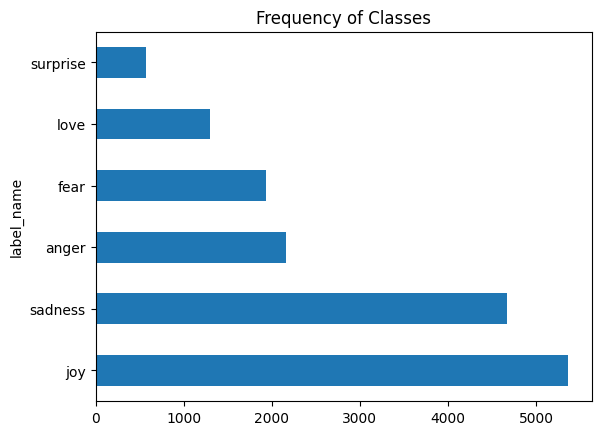

In [10]:
label_counts = data['label_name'].value_counts()
label_counts.plot.barh()
plt.title('Frequency of Classes')
plt.show()

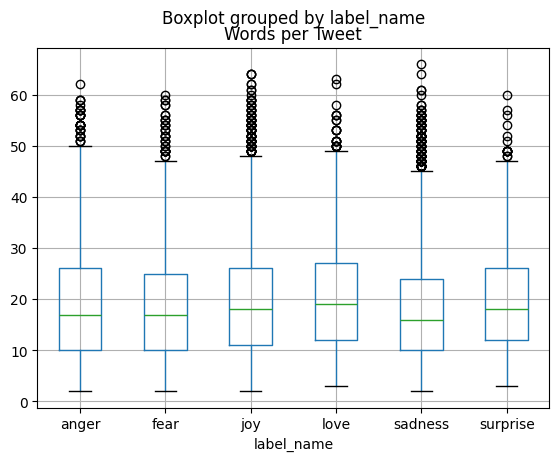

In [11]:
data['Words per Tweet'] = data['text'].str.split().apply(len)
data.boxplot('Words per Tweet', by= 'label_name');

In [12]:
# ÿπŸÖŸÑ€åÿßÿ™ ÿ™Ÿà⁄©ŸÜ ÿ≥ÿßÿ≤€å ÿ®ÿ±ÿß€å ŸÖÿ™ŸÜ ÿ±ÿß ÿßŸÜÿ¨ÿßŸÖ ŸÖ€å ÿØŸá€åŸÖÿå ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤€å ŸÅÿ±ÿ¢€åŸÜÿØ€å ÿßÿ≥ÿ™ ⁄©Ÿá ŸÖÿ™ŸÜ ÿ±ÿß ÿ®Ÿá ÿßÿ¨ÿ≤ÿß€å ⁄©Ÿà⁄Ü⁄©‚Äåÿ™ÿ±ÿå ŸÖÿπŸÖŸàŸÑÿßŸã ⁄©ŸÑŸÖÿßÿ™ÿå ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å‚Äå⁄©ŸÜÿØ

model_ckpt = "bert-base-uncased"  # ŸÖÿ™ÿ∫€å€åÿ±€å ÿ±ÿß ÿ™ÿπÿ±€åŸÅ ŸÖ€å ⁄©ŸÜ€åŸÖ Ÿà ŸÜÿßŸÖ ŸÖÿØŸÑ ÿ®ÿ±ÿ™ ÿ±ÿß ÿØÿ± ÿ¢ŸÜ ÿ∞ÿÆ€åÿ±Ÿá ŸÖ€å ⁄©ŸÜ€åŸÖ
tokenizer = AutoTokenizer.from_pretrained(model_ckpt) # €å⁄© ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿ™Ÿà⁄©ŸÜ ÿ≥ÿßÿ≤ ÿ±ÿß ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ŸÖÿØŸÑ ÿ®ÿ±ÿ™ ⁄©Ÿá ŸÇÿ®ŸÑÿß ÿ™ÿπ€å€åŸÜ ÿ¥ÿØŸá ÿß€åÿ¨ÿßÿØ ŸÖ€å ⁄©ŸÜÿØ
text = "I love machine learning! Tokenization is awesome!!" # €å⁄© ŸÖÿ™ŸÜ ÿ®ÿ±ÿß€å ÿ™ÿ≥ÿ™ Ÿà ÿ¢ÿ≤ŸÖÿß€åÿ¥ ŸÖ€å ŸÜŸà€åÿ≥€åŸÖ
encoded_text = tokenizer(text) # ŸÖÿ™ŸÜ ÿ±ÿß ÿ®ÿπŸÜŸàÿßŸÜ Ÿàÿ±ŸàÿØ€å ÿ®Ÿá ÿ™Ÿà⁄©ŸÜ ŸÖ€å ÿØŸá€åŸÖ Ÿà ÿ¢ŸÜ ÿ±ÿß ÿ®Ÿá ŸÅÿ±ŸÖ ⁄©ÿØ⁄Øÿ∞ÿßÿ±€å ÿ¥ÿØŸá (ÿßŸÜ⁄©ÿØ) ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å ⁄©ŸÜÿØ
print(encoded_text)

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 19204, 3989, 2003, 12476, 999, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
# ÿØÿ± ÿÆÿ±Ÿàÿ¨€å ÿ®ÿßŸÑÿß ŸÖŸàÿßÿ±ÿØ ÿ®Ÿá ÿ¥ÿ±ÿ≠ ÿ∞€åŸÑ ÿßÿ≥ÿ™
# input_ids: ÿß€åŸÜ ŸÇÿ≥ŸÖÿ™ÿå ŸÜŸÖÿß€åÿ¥€å ÿπÿØÿØ€å ÿßÿ≤ ŸÖÿ™ŸÜ Ÿàÿ±ŸàÿØ€å ÿßÿ≥ÿ™ ⁄©Ÿá Ÿáÿ± ⁄©ŸÑŸÖŸá €åÿß ÿ™Ÿà⁄©ŸÜ ÿ±ÿß ÿ®Ÿá €å⁄© ÿ¥ŸÜÿßÿ≥Ÿá ÿπÿØÿØ€å ÿÆÿßÿµ ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å‚Äå⁄©ŸÜÿØÿå ÿπÿØÿØ 101 ŸÜÿ¥ÿßŸÜ ÿØŸáŸÜÿØŸá ÿ¢ÿ∫ÿßÿ≤ ÿ¨ŸÖŸÑŸá Ÿà ÿπÿØÿØ 102 ŸÜÿ¥ÿßŸÜ ÿØŸáŸÜÿØŸá Ÿæÿß€åÿßŸÜ ÿ¨ŸÖŸÑŸá Ÿáÿ≥ÿ™
# token_type_ids:  ÿß€åŸÜ ÿ®ÿÆÿ¥ ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá Ÿáÿ± ÿ™Ÿà⁄©ŸÜ ŸÖÿ™ÿπŸÑŸÇ ÿ®Ÿá ⁄©ÿØÿßŸÖ ÿ¨ŸÖŸÑŸá €åÿß ÿ®ÿÆÿ¥ ÿßÿ≤ ŸÖÿ™ŸÜ ÿßÿ≥ÿ™. ÿØÿ± ÿ™ÿ≠ŸÑ€åŸÑ‚ÄåŸáÿß€å ÿØŸà ÿ¨ŸÖŸÑŸá‚Äåÿß€åÿå ÿß€åŸÜ ÿ¥ŸÜÿßÿ≥Ÿá‚ÄåŸáÿß ⁄©ŸÖ⁄© ŸÖ€å‚Äå⁄©ŸÜŸÜÿØ Ÿà ÿØÿ± ÿß€åŸÜÿ¨ÿßÿå ÿ™ŸÖÿßŸÖ ŸÖŸÇÿßÿØ€åÿ± 0 Ÿáÿ≥ÿ™ŸÜÿØÿå ÿ≤€åÿ±ÿß ŸÅŸÇÿ∑ €å⁄© ÿ¨ŸÖŸÑŸá ÿ®Ÿá ŸÖÿØŸÑ ÿØÿßÿØŸá ÿ¥ÿØŸá Ÿà ŸáŸÖŸá ÿ™Ÿà⁄©ŸÜ‚ÄåŸáÿß ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá €å⁄© ÿ®ÿÆÿ¥ (ÿ®ÿÆÿ¥ ÿµŸÅÿ±ŸÖ) Ÿáÿ≥ÿ™ŸÜÿØ
# attention_mask: ÿ™ÿπ€å€åŸÜ ŸÖ€å ⁄©ŸÜÿØ ⁄©Ÿá ⁄©ÿØÿßŸÖ ÿ™Ÿà⁄©ŸÜ Ÿáÿß ÿØÿ± ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ®ÿß€åÿØ ŸÖŸàÿ±ÿØ ÿ™Ÿàÿ¨Ÿá ŸÇÿ±ÿßÿ± ⁄Ø€åÿ±ÿØ Ÿà ⁄©ÿØÿßŸÖ Ÿáÿß ŸÜÿ®ÿß€åÿØ ŸÇÿ±ÿßÿ± ⁄Ø€åÿ±ÿØ Ÿà ⁄ÜŸàŸÜ ÿ™ŸÖÿßŸÖ ÿßÿπÿØÿßÿØ €å⁄© ÿßÿ≥ÿ™ Ÿæÿ≥ €åÿπŸÜ€å ŸáŸÖŸá ÿ™Ÿà⁄©ŸÜ‚ÄåŸáÿß ÿ®ÿß€åÿØ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ¥ŸàŸÜÿØ. ÿß€åŸÜ ÿ≠ÿßŸÑÿ™ ÿ≤ŸÖÿßŸÜ€å ÿ±ÿÆ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá Ÿá€å⁄Ü ÿ™Ÿà⁄©ŸÜ ÿßÿ∂ÿßŸÅ€å €åÿß ÿÆÿßŸÑ€å ÿØÿ± Ÿàÿ±ŸàÿØ€å Ÿàÿ¨ŸàÿØ ŸÜÿØÿßÿ±ÿØ

In [14]:
len(tokenizer.vocab), tokenizer.vocab_size, tokenizer.model_max_length
# len(tokenizer.vocab): ÿß€åŸÜ ÿÆÿ∑ ÿßŸÜÿØÿßÿ≤Ÿá Ÿàÿß⁄ò⁄ØÿßŸÜ ŸÖÿØŸÑ ÿ±ÿß ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖ€å‚Äå⁄©ŸÜÿØ ÿß€åŸÜ ÿØÿ≥ÿ™Ÿàÿ± ÿ®Ÿá ÿ¥ŸÖÿß ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿ™Ÿà⁄©ŸÜ‚ÄåŸáÿß€å ŸÖŸÜÿ≠ÿµÿ±ÿ®Ÿá‚ÄåŸÅÿ±ÿØ€å ⁄©Ÿá ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤ ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ⁄©ŸÜÿØ ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ. ÿß€åŸÜ ÿπÿØÿØ ÿ®ÿ±ÿßÿ®ÿ± ÿ®ÿß ÿßŸÜÿØÿßÿ≤Ÿá Ÿàÿß⁄ò⁄ØÿßŸÜ ŸÖÿØŸÑ ÿ®ÿ±ÿ™ ÿßÿ≥ÿ™ (ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿπŸÖŸàŸÑ €≥€∞,€∞€∞€∞ €åÿß ÿ®€åÿ¥ÿ™ÿ±).
#tokenizer.vocab_size: ÿß€åŸÜ Ÿà€å⁄ò⁄Ø€å ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿ≥ÿ™ŸÇ€åŸÖ ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿ™Ÿà⁄©ŸÜ‚ÄåŸáÿß€å ŸÇÿßÿ®ŸÑ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿØÿ± ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤ ÿ±ÿß ÿ®Ÿá ÿπŸÜŸàÿßŸÜ €å⁄© ŸÖŸÇÿØÿßÿ± (ÿπÿØÿØ ÿµÿ≠€åÿ≠) ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ
#tokenizer.model_max_length: ÿß€åŸÜ Ÿà€å⁄ò⁄Ø€å ÿ∑ŸàŸÑ ÿ≠ÿØÿß⁄©ÿ´ÿ±€å ŸÖÿ™ŸÜ€å ⁄©Ÿá ŸÖÿØŸÑ ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ⁄©ŸÜÿØ ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ. €åÿπŸÜ€å ÿ≠ÿØÿß⁄©ÿ´ÿ± ÿ™ÿπÿØÿßÿØ ÿ™Ÿà⁄©ŸÜ‚ÄåŸáÿß€å€å ⁄©Ÿá ŸÖÿØŸÑ ÿ®ÿ±ÿ™ ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ ÿØÿ± €å⁄© ŸÖÿ±ÿ≠ŸÑŸá (ÿ®Ÿá ÿ∑Ÿàÿ± ŸÖÿπŸÖŸàŸÑ €µ€±€≤ ÿ™Ÿà⁄©ŸÜ) ÿ®Ÿæÿ∞€åÿ±ÿØ.
# ÿß€åŸÜ ⁄©ÿØ ÿ≥Ÿá Ÿà€å⁄ò⁄Ø€å ⁄©ŸÑ€åÿØ€å ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤ ÿ®ÿ±ÿ™ ÿ±ÿß ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÖ€å‚Äå⁄©ŸÜÿØ: ÿßŸÜÿØÿßÿ≤Ÿá Ÿàÿß⁄ò⁄ØÿßŸÜÿå ÿ™ÿπÿØÿßÿØ ÿ™Ÿà⁄©ŸÜ‚ÄåŸáÿß Ÿà ÿ≠ÿØÿß⁄©ÿ´ÿ± ÿ∑ŸàŸÑ ŸÖÿ™ŸÜ ŸÇÿßÿ®ŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥

(30522, 30522, 512)

In [15]:
# stratify: ÿ®ÿ±ÿß€å ÿß€åŸÜ⁄©Ÿá ÿ™Ÿàÿ≤€åÿπ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß (⁄©ŸÑÿßÿ≥‚ÄåŸáÿß€å ÿØÿßÿØŸá‚ÄåŸáÿß) ÿØÿ± ŸÖÿ¨ŸÖŸàÿπŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€å Ÿà ÿ™ÿ≥ÿ™€å ŸÖÿ¥ÿßÿ®Ÿá ÿ®ÿßÿ¥ÿØ Ÿà ŸÖÿØŸÑ ÿ®Ÿá ÿµŸàÿ±ÿ™ ŸÖÿ™Ÿàÿßÿ≤ŸÜ ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ®ÿ®€åŸÜÿØ
train, test = train_test_split(data, test_size = 0.3, stratify = data['label_name'])
# test_size: €å⁄© ÿ≥ŸàŸÖ ÿßÿ≤ ŸÖÿ¨ŸÖŸàÿπŸá ÿßŸàŸÑ€åŸá ÿ™ÿ≥ÿ™ ÿ®Ÿá ÿπŸÜŸàÿßŸÜ ŸÖÿ¨ŸÖŸàÿπŸá ÿßÿπÿ™ÿ®ÿßÿ± (validation) ÿ¨ÿØÿß ŸÖ€å‚Äåÿ¥ŸàÿØ. ÿØÿ± ŸÜŸáÿß€åÿ™ €≤€∞Ÿ™ ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ™ÿ≥ÿ™ Ÿà €±€∞Ÿ™ ÿ®Ÿá ÿßÿπÿ™ÿ®ÿßÿ± ÿßÿÆÿ™ÿµÿßÿµ ŸÖ€å‚Äå€åÿßÿ®ÿØ
test, validation = train_test_split(test, test_size = 1/3, stratify = test['label_name'])
train.shape, test.shape, validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [16]:
# €å⁄© ÿ≥ÿßÿÆÿ™ÿßÿ± ÿØ€å⁄©ÿ¥ŸÜÿ±€å ŸÖÿßŸÜŸÜÿØ ÿßÿ≥ÿ™ ⁄©Ÿá ÿ®ÿ±ÿß€å ŸÖÿØ€åÿ±€åÿ™ ⁄ÜŸÜÿØ€åŸÜ ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá ÿ®Ÿá ÿµŸàÿ±ÿ™ ŸáŸÖÿ≤ŸÖÿßŸÜ (ŸÖÿ´ŸÑÿßŸã ŸÖÿ¨ŸÖŸàÿπŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€åÿå ÿ™ÿ≥ÿ™ Ÿà ÿßÿπÿ™ÿ®ÿßÿ±) ÿ®ÿ≥€åÿßÿ± ŸÖŸÜÿßÿ≥ÿ® ÿßÿ≥ÿ™
dataset = DatasetDict({
    # ÿ™ÿ®ÿØ€åŸÑ ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ŸæÿßŸÜÿØÿßÿ≥ ÿ®Ÿá ÿ¥€åÿ° ÿØ€åÿ™ÿßÿ≥ÿ™ ÿßŸÖ⁄©ÿßŸÜ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å Ÿæ€åÿ¥ÿ±ŸÅÿ™Ÿá ⁄©ÿ™ÿßÿ®ÿÆÿßŸÜŸá ÿØ€åÿ™ÿßÿ≥ÿ™ ŸÖÿßŸÜŸÜÿØ ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤€å Ÿà Ÿæ€åÿ¥‚ÄåŸæÿ±ÿØÿßÿ≤ÿ¥ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ±ÿß ŸÅÿ±ÿßŸáŸÖ ŸÖ€å‚Äå⁄©ŸÜÿØ
    # preserve_index: ÿß€åŸÜ ⁄Øÿ≤€åŸÜŸá ÿ™ÿπ€å€åŸÜ ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ÿ¥ÿßÿÆÿµ (ÿß€åŸÜÿØ⁄©ÿ≥) ÿßÿµŸÑ€å ÿØÿ®ÿ™ÿßŸÅÿ±€åŸÖ ÿ≠ŸÅÿ∏ ŸÜÿ¥ŸàÿØ. ÿß€åŸÜ ŸÖŸàÿ∂Ÿàÿπ ÿ®Ÿá ⁄©ÿßÿ± ŸÖ€å‚Äåÿ¢€åÿØ ÿ™ÿß ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿØŸàŸÜ ÿ≥ÿ™ŸàŸÜ ÿßÿ∂ÿßŸÅ€å ÿ®ÿ±ÿß€å ÿß€åŸÜÿØ⁄©ÿ≥ ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿ¥ŸàŸÜÿØ
    'train': Dataset.from_pandas(train, preserve_index = False),
    'test': Dataset.from_pandas(test, preserve_index = False),
    'validation': Dataset.from_pandas(validation, preserve_index = False)
})
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 1600
    })
})

In [17]:
dataset['train'][0], dataset['train'][1]

({'text': 'i still feel very amorous',
  'label': 2,
  'label_name': 'love',
  'Words per Tweet': 5},
 {'text': 'i feel soooo impatient',
  'label': 3,
  'label_name': 'anger',
  'Words per Tweet': 4})

In [18]:
# ÿß€åŸÜ ÿ™ÿßÿ®ÿπ ÿ®Ÿá ÿ¥ŸÖÿß ÿßŸÖ⁄©ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ÿ™ÿß ÿØÿßÿØŸá‚ÄåŸáÿß ÿ±ÿß ÿ®Ÿá ÿ±ÿßÿ≠ÿ™€å Ÿà ÿ®Ÿá ÿµŸàÿ±ÿ™ €å⁄©Ÿæÿßÿ±⁄ÜŸá ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤€å ⁄©ŸÜ€åÿØ
def tokenize(batch):
    # batch['text']: ÿß€åŸÜ ÿ®ÿÆÿ¥ ŸÖÿ™ŸÜ‚ÄåŸáÿß€å€å ⁄©Ÿá ÿ®ÿß€åÿØ ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤€å ÿ¥ŸàŸÜÿØ ÿ±ÿß ÿßÿ≤ ÿ≥ÿ™ŸàŸÜ text ÿØÿ± Ÿàÿ±ŸàÿØ€å ŸÖ€å‚Äå⁄Ø€åÿ±ÿØ
    # padding: ÿß€åŸÜ ⁄Øÿ≤€åŸÜŸá ÿ®ÿßÿπÿ´ ŸÖ€å‚Äåÿ¥ŸàÿØ ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤ÿå Ÿàÿ±ŸàÿØ€å‚ÄåŸáÿß ÿ±ÿß ÿ®ÿß ÿßŸÅÿ≤ŸàÿØŸÜ padding ÿ®Ÿá ÿ∑ŸàŸÑ ŸÖÿ¥ÿÆÿµ€å ÿ®ÿ±ÿ≥ÿßŸÜÿØ ÿ™ÿß ŸáŸÖŸá Ÿàÿ±ŸàÿØ€å‚ÄåŸáÿß ÿ∑ŸàŸÑ €å⁄©ÿ≥ÿßŸÜ€å ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ŸÜÿØ. ÿß€åŸÜ Ÿà€å⁄ò⁄Ø€å ÿ®ÿ±ÿß€å Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿØÿ≥ÿ™Ÿá‚Äåÿß€å (batch processing) ŸÖŸáŸÖ ÿßÿ≥ÿ™.
    # truncation: ÿß€åŸÜ ⁄Øÿ≤€åŸÜŸá ÿ®ÿßÿπÿ´ ŸÖ€å‚Äåÿ¥ŸàÿØ ÿß⁄Øÿ± ŸÖÿ™ŸÜ€å ÿ∑ŸàŸÑÿßŸÜ€å‚Äåÿ™ÿ± ÿßÿ≤ ÿ≠ÿØÿß⁄©ÿ´ÿ± ÿ∑ŸàŸÑ ŸÇÿßÿ®ŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ™Ÿàÿ≥ÿ∑ ŸÖÿØŸÑ ÿ®ÿßÿ¥ÿØÿå ÿ¢ŸÜ ÿ±ÿß ⁄©Ÿàÿ™ÿßŸá ⁄©ŸÜÿØ
    temp = tokenizer(batch['text'], padding=True, truncation=True)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 2145, 2514, 2200, 16095, 3560, 102], [101, 1045, 2514, 17111, 9541, 17380, 102, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0]]}


In [19]:
# ÿß€åŸÜ ÿ±Ÿàÿ¥ ÿ®ÿ±ÿß€å Ÿæ€åÿ¥‚ÄåŸæÿ±ÿØÿßÿ≤ÿ¥ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ⁄©ÿßÿ± ŸÖ€å‚Äåÿ±ŸàÿØ ÿ™ÿß ÿ™ŸÖÿßŸÖ ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá‚ÄåŸáÿß ÿ±ÿß ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤€å ⁄©ŸÜÿØ Ÿà ŸÜÿ™ÿß€åÿ¨ ÿ±ÿß ÿ®Ÿá ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá ÿßÿ∂ÿßŸÅŸá ⁄©ŸÜÿØ. ÿß€åŸÜ ÿ®ÿßÿπÿ´ ŸÖ€å‚Äåÿ¥ŸàÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ¢ŸÖÿßÿØŸá Ÿàÿ±ŸàÿØ ÿ®Ÿá ŸÖÿØŸÑ ÿ¥ŸàŸÜÿØ
# tokenize: ÿß€åŸÜ ŸáŸÖÿßŸÜ ÿ™ÿßÿ®ÿπ€å ÿßÿ≥ÿ™ ⁄©Ÿá ŸÇÿ®ŸÑÿßŸã ÿ™ÿπÿ±€åŸÅ ⁄©ÿ±ÿØ€åŸÖ Ÿà ÿπŸÖŸÑ ÿ™Ÿà⁄©ŸÜ‚Äåÿ≥ÿßÿ≤€å ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß ÿ±ÿß ÿßŸÜÿ¨ÿßŸÖ ŸÖ€å‚ÄåÿØŸáÿØ
# batched: ÿß€åŸÜ ÿ¢ÿ±⁄ØŸàŸÖÿßŸÜ ÿ™ÿπ€å€åŸÜ ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ÿ™ÿßÿ®ÿπ tokenize ÿ®ÿß€åÿØ ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿØÿ≥ÿ™Ÿá‚Äåÿß€å (batch) ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß ÿßÿπŸÖÿßŸÑ ÿ¥ŸàÿØÿå ŸÜŸá ŸÜŸÖŸàŸÜŸá ÿ®Ÿá ŸÜŸÖŸàŸÜŸá ÿß€åŸÜ ⁄Øÿ≤€åŸÜŸá ÿ®ÿßÿπÿ´ ŸÖ€å‚Äåÿ¥ŸàÿØ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ≥ÿ±€åÿπ‚Äåÿ™ÿ± Ÿà ⁄©ÿßÿ±ÿ¢ŸÖÿØÿ™ÿ± ÿßŸÜÿ¨ÿßŸÖ ÿ¥ŸàÿØÿå ÿ®Ÿá ÿÆÿµŸàÿµ ŸàŸÇÿ™€å ÿ®ÿß ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ®ÿ≤ÿ±⁄Ø ⁄©ÿßÿ± ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ
# batch_size: ÿß€åŸÜ ÿ¢ÿ±⁄ØŸàŸÖÿßŸÜ ŸÖÿ¥ÿÆÿµ ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ÿßŸÜÿØÿßÿ≤Ÿá ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß (batch) ÿ®Ÿá ÿ∑Ÿàÿ± Ÿæ€åÿ¥‚ÄåŸÅÿ±ÿ∂ ÿ™Ÿàÿ≥ÿ∑ ⁄©ÿ™ÿßÿ®ÿÆÿßŸÜŸá ÿ™ŸÜÿ∏€åŸÖ ÿ¥ŸàÿØ
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [20]:
# label2id: ÿ®Ÿá ÿß€åŸÜ ÿÆÿßÿ∑ÿ± ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å ⁄©ŸÜ€åŸÖ ⁄©Ÿá ŸÖÿØŸÑ ÿ®ÿß€åÿØ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸÖÿ™ŸÜ€å ÿ±ÿß ÿ®Ÿá ÿßÿπÿØÿßÿØ ÿ™ÿ®ÿØ€åŸÑ ⁄©ŸÜÿØ ÿ™ÿß ŸÇÿßÿ®ŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ®ÿßÿ¥ŸÜÿØ
#id2label: ÿ®Ÿá ÿß€åŸÜ ÿÆÿßÿ∑ÿ± ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å ⁄©ŸÜ€åŸÖ ⁄©Ÿá ŸáŸÜ⁄ØÿßŸÖ ÿ™ŸÅÿ≥€åÿ± ÿÆÿ±Ÿàÿ¨€å ŸÖÿØŸÑ (Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß)ÿå ŸÜ€åÿßÿ≤ ÿØÿßÿ±€åŸÖ ⁄©Ÿá ÿ¥ŸÜÿßÿ≥Ÿá‚ÄåŸáÿß€å ÿπÿØÿØ€å ÿ±ÿß ÿØŸàÿ®ÿßÿ±Ÿá ÿ®Ÿá ŸÜÿßŸÖ‚ÄåŸáÿß€å ŸÇÿßÿ®ŸÑ ÿÆŸàÿßŸÜÿØŸÜ ÿ®ÿ±ÿß€å ÿßŸÜÿ≥ÿßŸÜ ÿ™ÿ®ÿØ€åŸÑ ⁄©ŸÜ€åŸÖ

label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'love': 2, 'anger': 3, 'joy': 1, 'sadness': 0, 'surprise': 5, 'fear': 4},
 {2: 'love', 3: 'anger', 1: 'joy', 0: 'sadness', 5: 'surprise', 4: 'fear'})

In [21]:
model = AutoModel.from_pretrained(model_ckpt)

In [22]:
# ÿß€åŸÜ ⁄©ÿØ ÿ®ÿ±ÿß€å ÿØÿ≥ÿ™ÿ±ÿ≥€å ÿ®Ÿá ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ŸÖÿØŸÑ ÿ®ÿßÿ±⁄Ø€åÿ±€å‚Äåÿ¥ÿØŸá ÿ®Ÿá ⁄©ÿßÿ± ŸÖ€å‚Äåÿ±ŸàÿØ Ÿà ÿ¨ÿ≤ÿ¶€åÿßÿ™ Ÿæ€å⁄©ÿ±ÿ®ŸÜÿØ€å ÿ¢ŸÜ ÿ±ÿß ŸÜŸÖÿß€åÿ¥ ŸÖ€å‚ÄåÿØŸáÿØ
model.config.id2label
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [23]:
# AutoModelForSequenceClassification: ÿ®ÿ±ÿß€å ÿ®ÿßÿ±⁄Ø€åÿ±€å €å⁄© ŸÖÿØŸÑ ÿßÿ≤ Ÿæ€åÿ¥‚Äåÿ¢ŸÖŸàÿ≤ÿ¥‚ÄåÿØ€åÿØŸá ŸÖŸÜÿßÿ≥ÿ® ÿ®ÿ±ÿß€å Ÿàÿ∏ÿß€åŸÅ ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å
# AutoConfig: ÿ®ÿ±ÿß€å ÿ®ÿßÿ±⁄Ø€åÿ±€å €åÿß ÿß€åÿ¨ÿßÿØ €å⁄© Ÿæ€å⁄©ÿ±ÿ®ŸÜÿØ€å ÿ®ÿ±ÿß€å ŸÖÿØŸÑ
from transformers import AutoModelForSequenceClassification, AutoConfig
# len(label2id): ÿß€åŸÜ ÿ™ÿπÿØÿßÿØ ÿ®ÿ±ÿß€å ÿ™ŸÜÿ∏€åŸÖ Ÿæ€å⁄©ÿ±ÿ®ŸÜÿØ€å ŸÖÿØŸÑ ŸÖŸàÿ±ÿØ ŸÜ€åÿßÿ≤ ÿßÿ≥ÿ™ ÿ™ÿß ŸÖÿØŸÑ ÿ®ÿØÿßŸÜÿØ ⁄ÜŸÜÿØ ⁄©ŸÑÿßÿ≥ ŸÖÿÆÿ™ŸÑŸÅ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ
num_labels = len(label2id)
# €åÿπŸÜ€å ÿß⁄Øÿ± gpu Ÿàÿ¨ŸàÿØ ÿØÿßÿ¥ÿ™ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ Ÿà ÿØÿ± ÿ∫€åÿ± ÿß€åŸÜÿµŸàÿ±ÿ™ ÿßÿ≤ cpu ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
#ÿß€åŸÜ ÿ¥€åÿ° ÿ¥ÿßŸÖŸÑ ÿßÿ∑ŸÑÿßÿπÿßÿ™€å ŸÖÿ´ŸÑ ÿ™ÿπÿØÿßÿØ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß Ÿà ŸÜ⁄Øÿßÿ¥ÿ™‚ÄåŸáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÜ‚ÄåŸáÿß ÿßÿ≥ÿ™ ⁄©Ÿá ÿ®ÿ±ÿß€å ÿ¥ÿÆÿµ€å‚Äåÿ≥ÿßÿ≤€å Ÿæ€å⁄©ÿ±ÿ®ŸÜÿØ€å ŸÖÿØŸÑ ŸÖŸÅ€åÿØ ÿßÿ≥ÿ™
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [25]:
# ÿß€åŸÜ ⁄©ŸÑÿßÿ≥ ÿ®Ÿá ÿ¥ŸÖÿß ÿßÿ¨ÿßÿ≤Ÿá ŸÖ€å‚ÄåÿØŸáÿØ ÿ™ÿß ÿ™ŸÜÿ∏€åŸÖÿßÿ™ Ÿà Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ŸÅÿ±ÿ¢€åŸÜÿØ ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ÿ±ÿß ŸÖÿ¥ÿÆÿµ ⁄©ŸÜ€åÿØ
from transformers import TrainingArguments
# batch_size: ÿßŸÜÿØÿßÿ≤Ÿá ÿØÿ≥ÿ™Ÿá Ÿáÿß ÿ®ÿ±ÿß€å Ÿáÿ± ŸÖÿ±ÿ≠ŸÑŸá ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ±ÿß ŸÖÿ¥ÿÆÿµ ŸÖ€å ⁄©ŸÜÿØ Ÿà ÿßŸÜÿ™ÿÆÿßÿ® ÿßŸÜÿØÿßÿ≤Ÿá ŸÖŸÜÿßÿ≥ÿ® ÿ®ÿ±ÿß€å ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß ÿ®Ÿá ÿ™ÿπÿßÿØŸÑ ÿ®€åŸÜ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ≠ÿßŸÅÿ∏Ÿá Ÿà ÿ≤ŸÖÿßŸÜ ÿ¢ŸÖŸàÿ≤ÿ¥ ⁄©ŸÖ⁄© ŸÖ€å‚Äå⁄©ŸÜÿØ. ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß€å ÿ®ÿ≤ÿ±⁄Ø‚Äåÿ™ÿ± ŸÖÿπŸÖŸàŸÑÿßŸã ÿ≥ÿ±ÿπÿ™ ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ±ÿß ÿßŸÅÿ≤ÿß€åÿ¥ ŸÖ€å‚ÄåÿØŸáŸÜÿØ ŸàŸÑ€å ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ≠ÿßŸÅÿ∏Ÿá ÿ®€åÿ¥ÿ™ÿ±€å ÿØÿßÿ±ŸÜÿØ
batch_size = 64
# ÿß€åŸÜ ŸÖÿ≥€åÿ± ÿ®ÿ±ÿß€å ÿ∞ÿÆ€åÿ±Ÿá ŸÖÿØŸÑ‚ÄåŸáÿß Ÿà ŸÅÿß€åŸÑ‚ÄåŸáÿß€å ÿÆÿ±Ÿàÿ¨€å ÿß€åÿ¨ÿßÿØ ÿ¥ÿØŸá ÿØÿ± ÿ∑ŸàŸÑ ŸÅÿ±ÿ¢€åŸÜÿØ ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ®Ÿá ⁄©ÿßÿ± ŸÖ€å‚Äåÿ±ŸàÿØ
training_dir = "bert_base_train_dir"
# output_dir: ŸÖÿ¥ÿÆÿµ ⁄©ÿ±ÿØŸÜ ŸÖÿ≠ŸÑ ÿ∞ÿÆ€åÿ±Ÿá ŸÜÿ™ÿß€åÿ¨ ÿ®ÿ±ÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å Ÿà ÿßÿØÿßŸÖŸá ÿ¢ŸÖŸàÿ≤ÿ¥
# overwrite_output_dir: ÿß⁄Øÿ± True ÿ®ÿßÿ¥ÿØÿå ŸÖÿ≠ÿ™Ÿà€åÿßÿ™ ŸæŸàÿ¥Ÿá ÿÆÿ±Ÿàÿ¨€å ÿØÿ± ÿµŸàÿ±ÿ™ Ÿàÿ¨ŸàÿØ ÿ®ÿßÿ≤ŸÜŸà€åÿ≥€å ŸÖ€å‚Äåÿ¥ŸàÿØ Ÿà ÿ®ÿ±ÿß€å ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ÿÆÿ∑ÿß ÿØÿ± ÿµŸàÿ±ÿ™ Ÿàÿ¨ŸàÿØ ŸÅÿß€åŸÑ‚ÄåŸáÿß€å ŸÇÿØ€åŸÖ€å ÿØÿ± ŸÖÿ≥€åÿ± ÿÆÿ±Ÿàÿ¨€å
# num_train_epochs: ÿ™ÿπÿØÿßÿØ ÿØŸÅÿπÿßÿ™€å ⁄©Ÿá ŸÖÿØŸÑ ÿ±Ÿà€å ⁄©ŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€å ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖ€å‚Äåÿ®€åŸÜÿØ
# learning_rate: ŸÜÿ±ÿÆ €åÿßÿØ⁄Ø€åÿ±€å ⁄©Ÿá ŸÖÿ¥ÿÆÿµ ŸÖ€å‚Äå⁄©ŸÜÿØ ŸÖÿØŸÑ ÿØÿ± Ÿáÿ± ÿ®Ÿá‚Äåÿ±Ÿàÿ≤ÿ±ÿ≥ÿßŸÜ€å Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß€å ÿÆŸàÿØ ⁄ÜŸÇÿØÿ± ÿ™ÿ∫€å€åÿ± ⁄©ŸÜÿØ
# per_device_train_batch_size: ÿßŸÜÿØÿßÿ≤Ÿá ÿØÿ≥ÿ™Ÿá ÿ®ÿ±ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØÿ± Ÿáÿ± ÿØÿ≥ÿ™⁄ØÿßŸá CPU Ÿà GPU
# per_device_eval_batch_size: ÿßŸÜÿØÿßÿ≤Ÿá ÿØÿ≥ÿ™Ÿá ÿ®ÿ±ÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ÿØÿ± Ÿáÿ± ÿØÿ≥ÿ™⁄ØÿßŸá Ÿà ⁄©ŸÖ⁄© ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ÿØÿ± ÿ≤ŸÖÿßŸÜ ÿßÿ±ÿ≤€åÿßÿ®€å ÿ≠ÿßŸÅÿ∏Ÿá ÿ®Ÿá€åŸÜŸá ŸÖÿµÿ±ŸÅ ÿ¥ŸàÿØ
# weight_decay: ŸÜÿ±ÿÆ ⁄©ÿßŸáÿ¥ Ÿàÿ≤ŸÜ ⁄©Ÿá ÿ®ÿ±ÿß€å ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ÿ®€åÿ¥‚Äåÿ®ÿ±ÿßÿ≤ÿ¥ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ Ÿà ⁄©ŸÖ⁄© ŸÖ€å‚Äå⁄©ŸÜÿØ ŸÖÿØŸÑ ÿßÿ≤ €åÿßÿØ⁄Ø€åÿ±€å ÿ®€åÿ¥ ÿßÿ≤ ÿ≠ÿØ Ÿæ€å⁄Ü€åÿØŸá ÿ¨ŸÑŸà⁄Ø€åÿ±€å ⁄©ŸÜÿØ Ÿà ÿ™ÿπŸÖ€åŸÖ ÿ®Ÿáÿ™ÿ±€å ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ÿØ
# evaluation_strategy: €åÿπŸÜ€å Ÿæÿ≥ ÿßÿ≤ Ÿáÿ± ÿß€åŸæÿß⁄© ŸÖÿØŸÑ ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖ€å ÿ¥ŸàÿØ Ÿà ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ Ÿæÿ≥ ÿßÿ≤ Ÿáÿ± ÿØŸàÿ±Ÿá ⁄©ŸÖ⁄© ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ™ÿß Ÿæ€åÿ¥ÿ±ŸÅÿ™ ŸÖÿØŸÑ ÿØÿ± ÿ∑ŸàŸÑ ÿ≤ŸÖÿßŸÜ ŸÖÿßŸÜ€åÿ™Ÿàÿ± ÿ¥ŸàÿØ
# disable_tqdm: ÿß⁄Øÿ± ŸÖŸÇÿØÿßÿ± ŸÅÿßŸÑÿ≥ ÿ®ÿßÿ¥ÿØ ŸÜŸàÿßÿ± Ÿæ€åÿ¥ÿ±ŸÅÿ™ ÿØÿ± ÿ∑ŸàŸÑ ÿØŸàÿ±Ÿá ŸÜŸÖÿß€åÿ¥ ÿØÿßÿØŸá ŸÖ€å ÿ¥ŸàÿØ
training_args = TrainingArguments( output_dir=training_dir,
                                  overwrite_output_dir = True,
                                  num_train_epochs = 2,
                                  learning_rate = 2e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm = False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [26]:
# ÿß€åŸÜ ⁄©ÿØ ÿ®ÿ±ÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ÿπŸÖŸÑ⁄©ÿ±ÿØ ŸÖÿØŸÑ ÿ®ÿß ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØŸÇÿ™ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ÿØÿ± ŸÖŸÇÿß€åÿ≥Ÿá ÿ®ÿß ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ
# ÿ®ÿßÿ±⁄Ø€åÿ±€å ÿ™ÿßÿ®ÿπ ÿØŸÇÿ™ ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚Äåÿ¥ÿØŸá Ÿà ŸàÿßŸÇÿπ€å
accuracy = evaluate.load("accuracy")
def compute_metrics_evaluate(eval_pred):
    # eval_pred: ÿ®Ÿá ÿ™ÿßÿ®ÿπ Ÿæÿßÿ≥ ÿØÿßÿØŸá ŸÖ€å ÿ¥ŸàÿØ Ÿà ÿ¥ÿßŸÖŸÑ ÿØŸà ŸÖÿØŸÑ ÿßÿ≥ÿ™ Ÿæ€åÿ¥ ÿ®€åŸÜ€å ŸÖÿØŸÑ Ÿà ÿ®ÿ±⁄Üÿ≥ÿ® Ÿáÿß€å ŸàÿßŸÇÿπ€å Ÿà ÿπŸÑÿ™ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿ®ÿ±ÿß€å ÿØÿ≥ÿ™ÿ±ÿ≥€å ÿ®Ÿá ŸÖŸÇÿßÿØ€åÿ± Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß Ÿà ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß ÿØÿ± ÿØÿßÿÆŸÑ ÿ™ÿßÿ®ÿπ ÿßÿ≥ÿ™
    predictions, labels = eval_pred
    # ŸÖÿØŸÑ ŸÖÿπŸÖŸàŸÑÿßŸã ÿÆÿ±Ÿàÿ¨€å ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥ ÿ±ÿß ÿ®ÿ±ŸÖ€å‚Äå⁄Øÿ±ÿØÿßŸÜÿØÿå Ÿà ÿ®ÿß ÿß€åŸÜ ÿÆÿ∑ ⁄©ÿØÿå ÿ®ÿßŸÑÿßÿ™ÿ±€åŸÜ ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿ®Ÿá ÿπŸÜŸàÿßŸÜ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÜŸáÿß€å€å ÿ®ÿ±ÿß€å Ÿáÿ± ŸÜŸÖŸàŸÜŸá ÿßŸÜÿ™ÿÆÿßÿ® ŸÖ€å‚Äåÿ¥ŸàÿØ
    predictions = np.argmax(predictions, axis=1)
    # ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØŸÇÿ™ ŸÖÿØŸÑ ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß Ÿà ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ Ÿà ÿß€åŸÜ ÿÆÿ∑ ÿØŸÇÿ™ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß€å ŸÖÿØŸÑ ÿ±ÿß ÿ®ÿ±ŸÖ€å‚Äå⁄Øÿ±ÿØÿßŸÜÿØ ÿ™ÿß ÿ®ÿ±ÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ÿπŸÖŸÑ⁄©ÿ±ÿØ ŸÖÿØŸÑ ÿØÿ± ÿ∑ŸàŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥ €åÿß ÿßÿ±ÿ≤€åÿßÿ®€å ŸÜŸáÿß€å€å ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿ¥ŸàÿØ
    return accuracy.compute(predictions=predictions, references=labels)

In [27]:
def compute_metrics(pred):
    # ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØŸÇÿ™ Ÿà ŸÜŸÖÿ±Ÿá F1 ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ÿØÿßÿ±€åŸÖ ÿ™ÿß ÿ®ÿ™ŸàÿßŸÜ€åŸÖ ÿ¢ŸÜ‚ÄåŸáÿß ÿ±ÿß ÿ®ÿß Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ŸÖŸÇÿß€åÿ≥Ÿá ⁄©ŸÜ€åŸÖ
    labels = pred.label_ids
    # ÿØÿ± ŸÖÿØŸÑ‚ÄåŸáÿß€å ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€åÿå Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ŸÖÿπŸÖŸàŸÑÿßŸã ÿ¥ÿßŸÖŸÑ ÿßÿ≠ÿ™ŸÖÿßŸÑ‚ÄåŸáÿß€å€å ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥ Ÿáÿ≥ÿ™ŸÜÿØ Ÿà ÿ®ÿ±⁄Üÿ≥ÿ® ÿ®ÿß ÿ®ÿßŸÑÿßÿ™ÿ±€åŸÜ ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿ±ÿß ÿßŸÜÿ™ÿÆÿßÿ® ŸÖ€å‚Äå⁄©ŸÜÿØ
    preds = pred.predictions.argmax(-1)
    # ÿ®Ÿá ÿß€åŸÜ ŸÖÿπŸÜÿßÿ≥ÿ™ ⁄©Ÿá ŸÜŸÖÿ±Ÿá F1 ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ¥ÿØŸá Ÿà ÿ®ÿß ÿ™Ÿàÿ¨Ÿá ÿ®Ÿá ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß Ÿàÿ≤ŸÜ‚ÄåÿØŸá€å ŸÖ€å‚Äåÿ¥ŸàÿØ
    f1 = f1_score(labels, preds, average="weighted")
    # ÿØŸÇÿ™ ÿ±ÿß ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄ÜŸá ÿØÿ±ÿµÿØ€å ÿßÿ≤ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ÿØÿ±ÿ≥ÿ™ Ÿáÿ≥ÿ™ŸÜÿØ
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [28]:
# ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ŸÖÿØŸÑÿå ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€å Ÿà ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€åÿå Ÿà ÿ™ŸÜÿ∏€åŸÖÿßÿ™ ÿ™ÿπÿ±€åŸÅ‚Äåÿ¥ÿØŸáÿå ŸÅÿ±ÿ¢€åŸÜÿØ ÿ¢ŸÖŸàÿ≤ÿ¥ Ÿà ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ±ÿß ŸÖÿØ€åÿ±€åÿ™ ŸÖ€å‚Äå⁄©ŸÜÿØ
# ŸÖÿØŸÑ ÿßÿ≤ ŸÇÿ®ŸÑ ÿ™ÿπÿ±€åŸÅ‚Äåÿ¥ÿØŸá (ŸÖÿ´ŸÑÿßŸã AutoModelForSequenceClassification) ÿ®Ÿá Trainer ÿØÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ
# training_args: ÿ™ÿπ€å€åŸÜ Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿßŸÜŸÜÿØ ÿ™ÿπÿØÿßÿØ epochŸáÿßÿå ŸÜÿ±ÿÆ €åÿßÿØ⁄Ø€åÿ±€åÿå ÿßŸÜÿØÿßÿ≤Ÿá ÿØÿ≥ÿ™Ÿá Ÿà ÿßÿ≥ÿ™ÿ±ÿßÿ™⁄ò€å ÿßÿ±ÿ≤€åÿßÿ®€å
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
                  # ÿß€åŸÜ ÿ™ÿßÿ®ÿπ (⁄©Ÿá ŸÇÿ®ŸÑÿßŸã ÿ™ÿπÿ±€åŸÅ ÿ¥ÿØŸá) ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØŸÇÿ™ Ÿà ŸÜŸÖÿ±Ÿá F1 ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ ÿ™ÿß ÿπŸÖŸÑ⁄©ÿ±ÿØ ŸÖÿØŸÑ ÿØÿ± ÿ∑ŸàŸÑ Ÿà Ÿæÿß€åÿßŸÜ ÿ¢ŸÖŸàÿ≤ÿ¥ ÿßÿ±ÿ≤€åÿßÿ®€å ÿ¥ŸàÿØ
                  compute_metrics=compute_metrics,
                  # ŸÖÿ¥ÿÆÿµ ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß€å€å ⁄©Ÿá ÿ®ÿ±ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿÆŸàÿßŸáŸÜÿØ ÿ¥ÿØ
                  train_dataset = emotion_encoded['train'],
                  # ⁄©ŸÖ⁄© ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ™ÿß ÿπŸÖŸÑ⁄©ÿ±ÿØ ŸÖÿØŸÑ ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿØŸàÿ±Ÿá‚Äåÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ÿ¥ÿØŸá Ÿà ŸÖÿßŸÜ€åÿ™Ÿàÿ± ÿ¥ŸàÿØ
                  eval_dataset = emotion_encoded['validation'],
                  # ÿ®ÿ±ÿß€å Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿØÿßÿØŸá‚ÄåŸáÿß€å Ÿàÿ±ŸàÿØ€å Ÿà ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿ¢ŸÜ‚ÄåŸáÿß ÿ®ÿ±ÿß€å ŸÖÿØŸÑ ÿ®Ÿá ÿ™Ÿà⁄©ŸÜÿß€åÿ≤ÿ± ŸÜ€åÿßÿ≤ ÿØÿßÿ±ÿØ
                  tokenizer = tokenizer)

In [31]:
!pip install wandb

In [32]:
wandb login

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [33]:
# ÿß€åŸÜ ŸÖÿ™ÿØ ÿÆÿ±Ÿàÿ¨€å‚ÄåŸáÿß€å€å ŸÖÿßŸÜŸÜÿØ ŸÑÿß⁄Ø‚ÄåŸáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá Ÿæ€åÿ¥ÿ±ŸÅÿ™ ÿ¢ŸÖŸàÿ≤ÿ¥ÿå ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ÿØŸàÿ±Ÿá‚Äåÿß€åÿå Ÿà Ÿàÿ∂ÿπ€åÿ™ ŸÜŸáÿß€å€å ŸÖÿØŸÑ ÿ±ÿß ŸÜŸÖÿß€åÿ¥ ŸÖ€å‚ÄåÿØŸáÿØ
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: msalarvand1990 (msalarvand1990-mpa). Use `wandb login --relogin` to force relogin


TrainOutput(global_step=350, training_loss=0.6881948852539063, metrics={'train_runtime': 333.3969, 'train_samples_per_second': 67.187, 'train_steps_per_second': 1.05, 'total_flos': 1001502421516800.0, 'train_loss': 0.6881948852539063, 'epoch': 2.0})

In [34]:
# ÿß€åŸÜ ⁄©ÿØ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÖÿØŸÑ ÿ±ÿß ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ÿ≥ÿ™ ÿßÿ¨ÿ±ÿß ŸÖ€å‚Äå⁄©ŸÜÿØ Ÿà ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ÿ±ÿß ÿ®ÿ±ÿß€å ÿß€åŸÜ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ŸÜŸÖÿß€åÿ¥ ŸÖ€å‚ÄåÿØŸáÿØ
#ÿ®ÿ±ÿß€å ÿßÿ¨ÿ±ÿß€å Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÖÿØŸÑ ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¨ÿØ€åÿØ (ÿØÿ± ÿß€åŸÜÿ¨ÿßÿå ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ÿ≥ÿ™) Ÿà ÿßÿ±ÿ≤€åÿßÿ®€å ÿπŸÖŸÑ⁄©ÿ±ÿØ ÿ¢ŸÜ ÿ±Ÿà€å ÿß€åŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß
preds_output = trainer.predict(emotion_encoded['test'])
# ÿ®ÿ±ÿß€å ŸÜŸÖÿß€åÿ¥ €åÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ⁄©Ÿá ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ÿ≥ÿ™ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ¥ÿØŸá‚ÄåÿßŸÜÿØ
preds_output.metrics

{'test_loss': 0.2759038507938385,
 'test_accuracy': 0.906875,
 'test_f1': 0.9062730985958986,
 'test_runtime': 12.496,
 'test_samples_per_second': 256.083,
 'test_steps_per_second': 4.001}

In [ ]:
# test_loss: ŸÖ€åÿ≤ÿßŸÜ ÿÆÿ∑ÿß ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá ŸÖÿØŸÑ ⁄ÜŸÇÿØÿ± ÿ®Ÿá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿØÿ±ÿ≥ÿ™ ŸÜÿ≤ÿØ€å⁄© ÿ®ŸàÿØŸá ÿßÿ≥ÿ™. ŸÖŸÇÿØÿßÿ± ⁄©ŸÖÿ™ÿ± ÿÆÿ∑ÿßÿå ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ®Ÿáÿ™ÿ± ŸÖÿØŸÑ ÿßÿ≥ÿ™
# test_accuracy: ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄ÜŸÜÿØ ÿØÿ±ÿµÿØ ÿßÿ≤ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß ÿ™Ÿàÿ≥ÿ∑ ŸÖÿØŸÑ ÿØÿ±ÿ≥ÿ™ ÿ®ŸàÿØŸá‚ÄåÿßŸÜÿØ
# test_f1: ŸÜŸÖÿ±Ÿá F1 ŸÖ€åÿßŸÜ⁄Ø€åŸÜ€å ÿßÿ≤ ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿØŸÇÿ™ (precision) Ÿà €åÿßÿØÿ¢Ÿàÿ±€å (recall) ÿßÿ≥ÿ™ Ÿà ÿ®Ÿá Ÿà€å⁄òŸá ÿ®ÿ±ÿß€å ŸÖÿ¨ŸÖŸàÿπŸá ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÜÿßŸÖÿ™Ÿàÿßÿ≤ŸÜ ⁄©ÿßÿ±ÿ®ÿ±ÿØ€å ÿßÿ≥ÿ™
# test_runtime: ÿß€åŸÜ ÿßÿ∑ŸÑÿßÿπÿßÿ™ ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá ŸÅÿ±ÿ¢€åŸÜÿØ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ⁄ÜŸÇÿØÿ± ÿ∑ŸàŸÑ ⁄©ÿ¥€åÿØŸá ÿßÿ≥ÿ™ Ÿà ÿ®Ÿá ÿ®Ÿá€åŸÜŸá‚Äåÿ≥ÿßÿ≤€å €åÿß ÿßÿ±ÿ≤€åÿßÿ®€å ⁄©ÿßÿ±ÿß€å€å ŸÖÿØŸÑ ⁄©ŸÖ⁄© ŸÖ€å‚Äå⁄©ŸÜÿØ
# test_samples_per_second: ÿß€åŸÜ ŸÖÿπ€åÿßÿ± ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá ÿ≥ÿ±ÿπÿ™ ŸÖÿØŸÑ ÿØÿ± Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿØÿßÿØŸá‚ÄåŸáÿß ÿßÿ≥ÿ™ Ÿà ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ ÿ®ÿ±ÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ÿπŸÖŸÑ⁄©ÿ±ÿØ Ÿæÿ±ÿØÿßÿ≤ÿ¥€å ŸÖÿØŸÑ ŸÖŸÅ€åÿØ ÿ®ÿßÿ¥ÿØ
# test_steps_per_second: ÿß€åŸÜ ŸÖÿπ€åÿßÿ± ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ ⁄©Ÿá ŸÖÿØŸÑ ⁄ÜŸÇÿØÿ± ÿ≥ÿ±€åÿπ ÿØÿ± Ÿáÿ± ⁄ØÿßŸÖ Ÿæ€åÿ¥ ŸÖ€å‚Äåÿ±ŸàÿØ Ÿà ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ ÿ®Ÿá ÿ¥ŸÜÿßÿ≥ÿß€å€å ŸÖÿ≠ÿØŸàÿØ€åÿ™‚ÄåŸáÿß€å ÿ≥ÿ±ÿπÿ™ Ÿæÿ±ÿØÿßÿ≤ÿ¥ Ÿà ÿ®Ÿáÿ®ŸàÿØ ⁄©ÿßÿ±ÿß€å€å ⁄©ŸÖ⁄© ⁄©ŸÜÿØ

In [35]:
# ÿß€åŸÜ ⁄©ÿØ ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß Ÿà ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ÿßÿ≤ ÿÆÿ±Ÿàÿ¨€å ŸÖÿØŸÑ ÿßÿ≥ÿ™ Ÿà ÿ≥Ÿæÿ≥ ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿ¢ŸÜ‚ÄåŸáÿß ÿ®ÿ±ÿß€å ŸÖŸÇÿß€åÿ≥Ÿá ÿπŸÖŸÑ⁄©ÿ±ÿØ ŸÖÿØŸÑ (ŸÖÿ´ŸÑÿßŸã ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØŸÇÿ™ €åÿß ŸÜŸÖÿ±Ÿá F1)
# ÿß€åŸÜ ÿÆÿ∑ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß€å ŸÖÿØŸÑ ÿ±ÿß ÿßÿ≤ ÿÆÿ±Ÿàÿ¨€å (preds_output.predictions) ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÖ€å‚Äå⁄©ŸÜÿØ Ÿà ÿ¢ŸÜ‚ÄåŸáÿß ÿ±ÿß ÿ®Ÿá ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚Äåÿ¥ÿØŸá ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å‚Äå⁄©ŸÜÿØ
# ÿ®ÿ±ÿß€å Ÿáÿ± ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿßÿå ÿ®ÿ±⁄Üÿ≥ÿ® ÿ®ÿß ÿ®ÿßŸÑÿßÿ™ÿ±€åŸÜ ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿ±ÿß ÿßŸÜÿ™ÿÆÿßÿ® ŸÖ€å‚Äå⁄©ŸÜÿØ. ÿ®Ÿá ÿπÿ®ÿßÿ±ÿ™ ÿØ€å⁄Øÿ±ÿå ÿß€åŸÜ ÿπŸÖŸÑ ⁄©ŸÑÿßÿ≥ ÿ®ÿß ÿ®ÿßŸÑÿßÿ™ÿ±€åŸÜ ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿ±ÿß ÿ®Ÿá ÿπŸÜŸàÿßŸÜ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÖÿØŸÑ ÿ®ÿ±ÿß€å Ÿáÿ± ŸÜŸÖŸàŸÜŸá ÿßŸÜÿ™ÿÆÿßÿ® ŸÖ€å‚Äå⁄©ŸÜÿØ
y_pred = np.argmax(preds_output.predictions, axis=1)
# ÿß€åŸÜ ÿÆÿ∑ ÿ®ÿ±ÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å(ÿØÿßÿØŸá Ÿáÿß€å ÿ™ÿ≥ÿ™) ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ ⁄©Ÿá ÿ®ÿß Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß€å ŸÖÿØŸÑ ŸÖŸÇÿß€åÿ≥Ÿá ÿÆŸàÿßŸáŸÜÿØ ÿ¥ÿØ
y_true = emotion_encoded['test'][:]['label']

In [36]:
# ÿß€åŸÜ ⁄©ÿØÿå ⁄Øÿ≤ÿßÿ±ÿ¥ ÿ¨ÿßŸÖÿπ€å ÿßÿ≤ ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ±ÿß ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ÿ≥ÿ™ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá Ÿà ⁄ÜÿßŸæ ŸÖ€å‚Äå⁄©ŸÜÿØ
# ÿ®Ÿá ŸÖŸÜÿ∏Ÿàÿ± ŸÖÿ≠ÿßÿ≥ÿ®Ÿá Ÿà ŸÜŸÖÿß€åÿ¥ ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿÆÿ™ŸÑŸÅ ÿ®ÿ±ÿß€å ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ⁄ÜŸÜÿØ⁄©ŸÑÿßÿ≥€å ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ. ÿß€åŸÜ ŸÖÿπ€åÿßÿ±Ÿáÿß ÿ¥ÿßŸÖŸÑ ÿØŸÇÿ™ (precision)ÿå €åÿßÿØÿ¢Ÿàÿ±€å (recall)ÿå Ÿà ŸÜŸÖÿ±Ÿá F1 ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥ Ÿáÿ≥ÿ™ŸÜÿØ.
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       933
           1       0.93      0.92      0.92      1072
           2       0.82      0.78      0.80       261
           3       0.89      0.91      0.90       432
           4       0.88      0.87      0.88       387
           5       0.89      0.76      0.82       115

    accuracy                           0.91      3200
   macro avg       0.89      0.87      0.88      3200
weighted avg       0.91      0.91      0.91      3200



In [37]:
label2id

{'love': 2, 'anger': 3, 'joy': 1, 'sadness': 0, 'surprise': 5, 'fear': 4}

In [38]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix


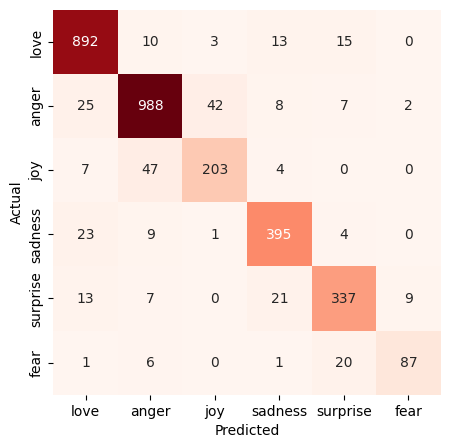

In [39]:
# ÿß€åŸÜ ÿÆÿ∑ÿå ŸÖÿßÿ™ÿ±€åÿ≥ ÿØÿ±ŸáŸÖ‚Äåÿ±€åÿÆÿ™⁄Ø€å ÿ±ÿß ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å Ÿà Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚ÄåŸáÿß€å ŸÖÿØŸÑ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÖ€å‚Äå⁄©ŸÜÿØ
cm = confusion_matrix(y_true, y_pred)
# ÿ™ÿπ€å€åŸÜ ÿßŸÜÿØÿßÿ≤Ÿá ÿ¥⁄©ŸÑ ÿ®ÿ±ÿß€å Ÿàÿ∂Ÿàÿ≠ Ÿà ŸÜŸÖÿß€åÿ¥ ÿ®Ÿáÿ™ÿ± ŸÖÿßÿ™ÿ±€åÿ≥ ÿØÿ±ŸáŸÖ‚Äåÿ±€åÿÆÿ™⁄Ø€å
plt.figure(figsize=(5,5))
# cm: ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÖÿßÿ™ÿ±€åÿ≥ ÿØÿ±ŸáŸÖ‚Äåÿ±€åÿÆÿ™⁄Ø€å ⁄©Ÿá ÿ®ÿß€åÿØ ŸÜŸÖÿß€åÿ¥ ÿØÿßÿØŸá ÿ¥ŸàÿØ
# annot=True: ÿßÿπÿØÿßÿØ ÿØÿ± Ÿáÿ± ÿÆÿßŸÜŸá ŸÜŸÖÿß€åÿ¥ ÿØÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàŸÜÿØ ÿ™ÿß ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß ÿØÿ± Ÿáÿ± ÿÆÿßŸÜŸá ŸÇÿßÿ®ŸÑ ŸÖÿ¥ÿßŸáÿØŸá ÿ®ÿßÿ¥ÿØ
# ÿßÿ≤ ÿßÿ≥ÿßŸÖ€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß (⁄©ŸÑ€åÿØŸáÿß€å label2id) ÿ®ÿ±ÿß€å ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸÖÿ≠Ÿàÿ± x Ÿà y ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàÿØ ÿ™ÿß ŸÜÿ¥ÿßŸÜ ÿØŸáÿØ Ÿáÿ± ÿ±ÿØ€åŸÅ Ÿà ÿ≥ÿ™ŸàŸÜ ŸÖÿ™ÿπŸÑŸÇ ÿ®Ÿá ⁄©ÿØÿßŸÖ ⁄©ŸÑÿßÿ≥ ÿßÿ≥ÿ™
# fmt='d': ŸÅÿ±ŸÖÿ™ ÿßÿπÿØÿßÿØ ÿØÿ± ÿÆÿßŸÜŸá‚ÄåŸáÿß ÿ±ÿß ÿ®Ÿá ÿßÿπÿØÿßÿØ ÿµÿ≠€åÿ≠ (integer) ÿ™ŸÜÿ∏€åŸÖ ŸÖ€å‚Äå⁄©ŸÜÿØ
# cbar=False: ÿßÿ≤ ŸÜŸÖÿß€åÿ¥ ŸÜŸàÿßÿ± ÿ±ŸÜ⁄Ø€å (color bar) ÿ¨ŸÑŸà⁄Ø€åÿ±€å ŸÖ€å‚Äå⁄©ŸÜÿØÿå ÿ≤€åÿ±ÿß ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿ∂ÿ±Ÿàÿ±€å ŸÜÿ®ÿßÿ¥ÿØ
# cmap='Reds': ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ⁄Øÿ±ŸÖÿß€å€å ÿ±ÿß ÿ®Ÿá ÿ∑€åŸÅ ÿ±ŸÜ⁄Ø‚ÄåŸáÿß€å ŸÇÿ±ŸÖÿ≤ ÿ™ÿ∫€å€åÿ± ŸÖ€å‚ÄåÿØŸáÿØ. ÿß€åŸÜ ÿ∑€åŸÅ ÿ±ŸÜ⁄Ø ÿ®Ÿá Ÿàÿ∂Ÿàÿ≠ ÿßÿ¥ÿ™ÿ®ÿßŸáÿßÿ™ ŸÖÿØŸÑ ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáÿØ
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [40]:
text = "I am super happy today. I got it done. Finally!!"

# ÿß€åŸÜ ⁄©ÿØ €å⁄© ÿ™ÿßÿ®ÿπ ÿ±ÿß ÿ™ÿπÿ±€åŸÅ ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá €å⁄© ŸÖÿ™ŸÜ Ÿàÿ±ŸàÿØ€å ÿ±ÿß ÿØÿ±€åÿßŸÅÿ™ ⁄©ÿ±ÿØŸáÿå ÿ¢ŸÜ ÿ±ÿß ÿ±ŸÖÿ≤⁄Øÿ∞ÿßÿ±€å ŸÖ€å‚Äå⁄©ŸÜÿØÿå Ÿà ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ŸÖÿØŸÑÿå Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ŸÖÿ™ŸÜ ÿ®Ÿá ⁄©ÿØÿßŸÖ ÿØÿ≥ÿ™Ÿá ÿ™ÿπŸÑŸÇ ÿØÿßÿ±ÿØ. ÿßÿ¨ÿßÿ≤Ÿá ÿØŸá€åÿØ Ÿáÿ± ÿÆÿ∑ ÿ±ÿß ÿØŸÇ€åŸÇÿßŸã ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€åŸÖ
def get_prediction(text):
    # ÿ®ÿ±ÿß€å ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá Ÿàÿ±ŸàÿØ€å ÿ¨Ÿáÿ™ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÖÿØŸÑÿå ŸÑÿßÿ≤ŸÖ ÿßÿ≥ÿ™ ⁄©Ÿá ŸÖÿ™ŸÜ ÿ®Ÿá ŸÅÿ±ŸÖÿ™ ŸÖŸàÿ±ÿØ ŸÜ€åÿßÿ≤ ŸÖÿØŸÑ (ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ™Ÿà⁄©ŸÜ‚Äåÿ¥ÿØŸá) ÿ™ÿ®ÿØ€åŸÑ ÿ¥ŸàÿØ
    # to(device): ÿß€åŸÜ ÿ®ÿÆÿ¥ ÿØÿßÿØŸá ÿ±ÿß ÿ®Ÿá ÿØÿ≥ÿ™⁄ØÿßŸá ŸÖÿ¥ÿÆÿµ‚Äåÿ¥ÿØŸá (ŸÖÿ´ŸÑÿßŸã GPU ÿß⁄Øÿ± ÿØÿ± ÿØÿ≥ÿ™ÿ±ÿ≥ ÿ®ÿßÿ¥ÿØ) ŸÖŸÜÿ™ŸÇŸÑ ŸÖ€å‚Äå⁄©ŸÜÿØ
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    # ÿ®ÿ±ÿß€å ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ŸÖÿ≠ÿßÿ≥ÿ®ÿßÿ™ ÿ∫€åÿ±ÿ∂ÿ±Ÿàÿ±€å Ÿà ÿ®Ÿá€åŸÜŸá‚Äåÿ≥ÿßÿ≤€å ÿ≠ÿßŸÅÿ∏Ÿá ÿßÿ≥ÿ™ÿå ÿ≤€åÿ±ÿß ÿØÿ± ÿß€åŸÜÿ¨ÿß ŸÅŸÇÿ∑ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿßŸÜÿ¨ÿßŸÖ ŸÖ€å‚Äåÿ¥ŸàÿØ Ÿà ŸÜ€åÿßÿ≤€å ÿ®Ÿá ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ⁄Øÿ±ÿßÿØ€åÿßŸÜ‚ÄåŸáÿß ÿ®ÿ±ÿß€å €åÿßÿØ⁄Ø€åÿ±€å ŸÜ€åÿ≥ÿ™
    with torch.no_grad():
    # ŸÖÿØŸÑ ÿ®ÿß ÿØÿ±€åÿßŸÅÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß€å Ÿàÿ±ŸàÿØ€åÿå ÿßÿ≠ÿ™ŸÖÿßŸÑÿßÿ™ €åÿß ÿÆÿ±Ÿàÿ¨€å‚ÄåŸáÿß€å ÿÆÿßŸÖ ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿØÿ≥ÿ™Ÿá‚ÄåŸáÿß€å ŸÖÿÆÿ™ŸÑŸÅ ÿ±ÿß ÿ®ÿ±ÿß€å ŸÖÿ™ŸÜ Ÿàÿ±ŸàÿØ€å ÿ®ÿ±ŸÖ€å‚Äå⁄Øÿ±ÿØÿßŸÜÿØ
        outputs = model(**input_encoded)
    # ÿ¥ÿßŸÖŸÑ ÿßÿ≠ÿ™ŸÖÿßŸÑ‚ÄåŸáÿß€å ÿÆÿßŸÖ ÿ®ÿ±ÿß€å Ÿáÿ± ÿØÿ≥ÿ™Ÿá Ÿáÿ≥ÿ™ŸÜÿØ ⁄©Ÿá ÿ®ÿ±ÿß€å ÿ™ÿµŸÖ€åŸÖ‚Äå⁄Ø€åÿ±€å ŸÜŸáÿß€å€å ŸÖŸàÿ±ÿØ ŸÜ€åÿßÿ≤ ÿßÿ≥ÿ™
    logits = outputs.logits
    # ÿß€åŸÜ ÿÆÿ∑ ŸÖÿ¥ÿÆÿµ ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ŸÖÿØŸÑ ⁄©ÿØÿßŸÖ ÿØÿ≥ÿ™Ÿá ÿ±ÿß ÿ®ÿß ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ÿßÿ∑ŸÖ€åŸÜÿßŸÜ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ⁄©ÿ±ÿØŸá ÿßÿ≥ÿ™
    # ÿßŸÜÿØ⁄©ÿ≥ (€åÿß ÿ¥ŸÖÿßÿ±Ÿá) ÿØÿ≥ÿ™Ÿá‚Äåÿß€å ÿ±ÿß ⁄©Ÿá ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿ±ÿß ÿØÿ± logits ÿØÿßÿ±ÿØÿå ÿ®Ÿá ÿØÿ≥ÿ™ ŸÖ€å‚Äåÿ¢Ÿàÿ±ÿØ Ÿà ÿ¢ŸÜ ÿ±ÿß ÿØÿ± pred ÿ∞ÿÆ€åÿ±Ÿá ŸÖ€å‚Äå⁄©ŸÜÿØ
    # dim=1: ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÖŸÇÿØÿßÿ± ÿ±ÿß ÿØÿ± ÿ®ÿπÿØ 1 Ÿæ€åÿØÿß ŸÖ€å‚Äå⁄©ŸÜÿØ Ÿà ÿßŸÜÿØ⁄©ÿ≥ ÿ¢ŸÜ ⁄©ŸÑÿßÿ≥ ÿ±ÿß ÿ®ÿ±ŸÖ€å‚Äå⁄Øÿ±ÿØÿßŸÜÿØ
    # item(): ÿßŸÜÿØ⁄©ÿ≥ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å‚Äåÿ¥ÿØŸá ÿ±ÿß ÿßÿ≤ ŸÇÿßŸÑÿ® Tensor ÿÆÿßÿ±ÿ¨ ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ™ÿß ÿ®Ÿá ÿ¥⁄©ŸÑ €å⁄© ŸÖŸÇÿØÿßÿ± ÿ≥ÿßÿØŸá ÿ®ÿßÿ¥ÿØ
    # ÿß€åŸÜ ÿÆÿ∑ ŸÖÿ¥ÿÆÿµ ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ŸÖÿØŸÑ ⁄©ÿØÿßŸÖ ÿØÿ≥ÿ™Ÿá ÿ±ÿß ÿ®ÿß ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ÿßÿ∑ŸÖ€åŸÜÿßŸÜ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ⁄©ÿ±ÿØŸá ÿßÿ≥ÿ™
    pred = torch.argmax(logits, dim=1).item()
    # id2label ÿ™ÿ®ÿØ€åŸÑ ÿ¥ŸÖÿßÿ±Ÿá ÿØÿ≥ÿ™Ÿá (ŸÖÿ´ŸÑÿßŸã 0ÿå 1ÿå ...) ÿ®Ÿá ŸÜÿßŸÖ ÿØÿ≥ÿ™Ÿá (ŸÖÿ´ŸÑÿßŸã "happy"ÿå "sad"ÿå ...) ÿ±ÿß ŸÅÿ±ÿßŸáŸÖ ŸÖ€å‚Äå⁄©ŸÜÿØÿå Ÿà ÿØÿ± ŸÜÿ™€åÿ¨Ÿáÿå ŸÜÿ™€åÿ¨Ÿá‚Äåÿß€å ŸÇÿßÿ®ŸÑ‚ÄåŸÅŸáŸÖ ÿ®ÿ±ÿß€å ÿßŸÜÿ≥ÿßŸÜ ÿ®ÿ±ŸÖ€å‚Äå⁄Øÿ±ÿØÿØ
    return id2label[pred]

get_prediction(text)

'joy'

In [41]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [42]:
# ÿß€åŸÜ ⁄©ÿØÿå €å⁄© ŸÖÿØŸÑ ÿßÿ≤ Ÿæ€åÿ¥ ÿ¢ŸÖŸàÿ≤ÿ¥‚ÄåÿØ€åÿØŸá ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ¥ÿØŸá ÿ±ÿß ÿ®ÿ±ÿß€å ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÖÿ™ŸÜ ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ŸÖ€å‚Äå⁄©ŸÜÿØ Ÿà ÿßÿ≤ ÿ¢ŸÜ ÿ®ÿ±ÿß€å Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿØÿ≥ÿ™Ÿá‚Äåÿ®ŸÜÿØ€å ÿßÿ≠ÿ≥ÿßÿ≥ €åÿß ŸÖŸàÿ∂Ÿàÿπ ⁄ÜŸÜÿØ ÿ¨ŸÖŸÑŸá ÿßÿ≥ÿ™ŸÅÿßÿØŸá ŸÖ€å‚Äå⁄©ŸÜÿØ
# €å⁄© ÿßÿ®ÿ≤ÿßÿ± ÿ≥ÿßÿØŸá ÿ®ÿ±ÿß€å ÿØÿ≥ÿ™ÿ±ÿ≥€å ÿ®Ÿá ŸÖÿØŸÑ‚ÄåŸáÿß€å ÿßÿ≤ Ÿæ€åÿ¥ ÿ¢ŸÖŸàÿ≤ÿ¥‚ÄåÿØ€åÿØŸá ÿßÿ≥ÿ™ ⁄©Ÿá ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ ÿßŸÜŸàÿßÿπ ŸÖÿÆÿ™ŸÑŸÅ€å ÿßÿ≤ Ÿàÿ∏ÿß€åŸÅ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ≤ÿ®ÿßŸÜ ÿ∑ÿ®€åÿπ€å  ŸÖÿßŸÜŸÜÿØ ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€åÿå ÿ™ÿ±ÿ¨ŸÖŸáÿå Ÿà ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß ÿ±ÿß ÿ®ÿß ÿ≥ŸáŸàŸÑÿ™ ÿßÿ¨ÿ±ÿß ⁄©ŸÜÿØ
from transformers import pipeline
# text-classification: ÿß€åŸÜ ŸÜŸàÿπ Ÿàÿ∏€åŸÅŸá Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ±ÿß ŸÖÿ¥ÿÆÿµ ŸÖ€å‚Äå⁄©ŸÜÿØ ⁄©Ÿá ÿØÿ± ÿß€åŸÜÿ¨ÿß ÿ∑ÿ®ŸÇŸá‚Äåÿ®ŸÜÿØ€å ŸÖÿ™ŸÜ ÿßÿ≥ÿ™
# model= 'bert-base-uncased-sentiment-model': ŸÖÿ≥€åÿ± ŸÖÿØŸÑ ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ¥ÿØŸá ÿ±ÿß ÿ™ÿπ€å€åŸÜ ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ™ÿß ŸáŸÖÿßŸÜ ŸÖÿØŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥‚ÄåÿØ€åÿØŸá‚Äå€å ŸÖÿß ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å Ÿà ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿ¥ŸàÿØ
classifier = pipeline('text-classification', model= 'bert-base-uncased-sentiment-model')
# ÿß€åŸÜ ÿ¨ŸÖŸÑÿßÿ™ ÿ®Ÿá ŸÖÿØŸÑ ÿØÿßÿØŸá ŸÖ€å‚Äåÿ¥ŸàŸÜÿØ ÿ™ÿß ŸÖÿØŸÑ ÿØÿ≥ÿ™Ÿá‚Äåÿ®ŸÜÿØ€å‚ÄåŸáÿß€å ŸÖŸÜÿßÿ≥ÿ® (ŸÖÿ´ŸÑÿßŸã ÿßÿ≠ÿ≥ÿßÿ≥ÿßÿ™ ŸÖÿ´ÿ®ÿ™ÿå ŸÖŸÜŸÅ€å €åÿß ÿÆŸÜÿ´€å) ÿ±ÿß ÿ®ÿ±ÿß€å Ÿáÿ± ÿ¨ŸÖŸÑŸá ÿ®ÿ±⁄Øÿ±ÿØÿßŸÜÿØ
classifier([text, 'hello, how are you?', "love you", "i am feeling low"])

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'joy', 'score': 0.9622090458869934},
 {'label': 'joy', 'score': 0.8579554557800293},
 {'label': 'love', 'score': 0.5772160887718201},
 {'label': 'sadness', 'score': 0.9659565091133118}]